In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from scipy import stats
import plotly.express as px
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/My Drive/data.csv',encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})

In [ ]:
data.head()

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [ ]:
print('Dataframe dimensions:', data.shape)

Dataframe dimensions: (541909, 8)


In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
data.isnull().sum()

ï»¿InvoiceNo         0
StockCode            0
Description       1454
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135080
Country              0
dtype: int64

In [ ]:
data

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [ ]:
data[["ï»¿InvoiceNo", "Quantity", "UnitPrice"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0


In [ ]:
nameDict={"ï»¿InvoiceNo":"InvoiceNo"}
data=data.rename(columns=nameDict)
print(data.columns.values)

['InvoiceNo' 'StockCode' 'Description' 'Quantity' 'InvoiceDate'
 'UnitPrice' 'CustomerID' 'Country']


In [ ]:
data[data['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


We get a 'C' prefix in invoice with negative quantity value imples the order was returned or cancelled

In [ ]:
cancelled_orders = data[data['InvoiceNo'].str.startswith('C', na=False)]
cancelled_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [ ]:
cancelled_orders.nunique()

InvoiceNo      3836
StockCode      1947
Description    1972
Quantity        135
InvoiceDate    3766
UnitPrice       573
CustomerID     1589
Country          30
dtype: int64

In [ ]:
special_codes = data[data['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
special_codes

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'B', 'CRUK'],
      dtype=object)

In [ ]:
for code in special_codes:
    print("{:<15} -> {:<30}".format(code, data[data['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE                       
D               -> Discount                      
C2              -> CARRIAGE                      
DOT             -> DOTCOM POSTAGE                
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
S               -> SAMPLES                       
AMAZONFEE       -> AMAZON FEE                    
DCGS0076        -> SUNJAR LED NIGHT NIGHT LIGHT  
DCGS0003        -> BOXED GLASS ASHTRAY           
gift_0001_40    -> Dotcomgiftshop Gift Voucher Â£40.00
DCGS0070        -> CAMOUFLAGE DOG COLLAR         
m               -> Manual                        
gift_0001_50    -> Dotcomgiftshop Gift Voucher Â£50.00
gift_0001_30    -> Dotcomgiftshop Gift Voucher Â£30.00
gift_0001_20    -> Dotcomgiftshop Gift Voucher Â£20.00
DCGS0055        -> nan                           
DCGS0072        -> nan                           
DCGS0074        -> nan                           
DCGS0069        -> OOH LA LA D

In [ ]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

This shows that out of 25900 Invoices 3836 products were cancelled

In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The number of null values in the dataframe ∼ 25% are not assigned to a particular customer. With the data available, it is impossible to impute values for the user and these entries so we delete it.

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(406829, 8)

Now we delete the duplicate values

In [ ]:
print('Duplicate values: {}'.format(data.duplicated().sum()))

Duplicate values: 5225


In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data[data['UnitPrice']==0].count()

InvoiceNo      40
StockCode      40
Description    40
Quantity       40
InvoiceDate    40
UnitPrice      40
CustomerID     40
Country        40
dtype: int64

In [ ]:
data.drop(data[data['UnitPrice']==0].index, inplace=True)

In [ ]:
cancelled_orders = data[data['InvoiceNo'].str.startswith('C', na=False)]
cancelled_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [ ]:
data.drop(cancelled_orders.index, inplace=True)

In [ ]:
data.shape

(392692, 8)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,392692.0,13.119702,180.492832,1.000,2.00,6.00,12.00,80995.00
UnitPrice,392692.0,3.125914,22.241836,0.001,1.25,1.95,3.75,8142.75


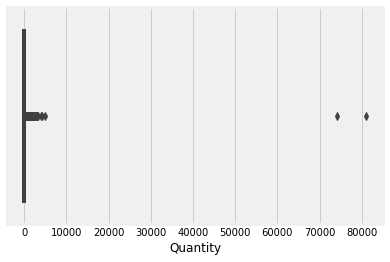

In [ ]:
sns.boxplot(data.Quantity)

In [ ]:
data.drop(data[data.Quantity>60000].index, inplace=True)

In [ ]:
temp=data[['CustomerID','InvoiceNo', 'Country']].groupby(['CustomerID','InvoiceNo','Country']).count()
temp=temp.reset_index(drop=False)
countries=temp['Country'].value_counts()
print('Number of countries: {}'.format(len(countries)))

Number of countries: 37


In [ ]:
# Plot countries by world map
fig = go.Figure(data=go.Choropleth(
    locations = countries.index,
locationmode = 'country names', z = countries,
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Order nb',
))

fig.update_layout(
    title_text='Number of orders per country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )


)

fig.show()

In [ ]:
#Create Total Sales column to store the Unit Price * Quantity
data['TotalRevenue']=data['UnitPrice']* data['Quantity']
data.sort_values("CustomerID")[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
14965,537626,21731,RED TOADSTOOL LED NIGHT LIGHT,12,2010-12-07 14:57:00,1.65,12347,Iceland,19.8
14950,537626,22727,ALARM CLOCK BAKELIKE RED,4,2010-12-07 14:57:00,3.75,12347,Iceland,15.0
14951,537626,22728,ALARM CLOCK BAKELIKE PINK,4,2010-12-07 14:57:00,3.75,12347,Iceland,15.0
14952,537626,22729,ALARM CLOCK BAKELIKE ORANGE,4,2010-12-07 14:57:00,3.75,12347,Iceland,15.0
14953,537626,22212,FOUR HOOK WHITE LOVEBIRDS,6,2010-12-07 14:57:00,2.10,12347,Iceland,12.6


In [ ]:
print('Min Invoice Date:',data.InvoiceDate.dt.date.min(),'max Invoice Date:', data.InvoiceDate.dt.date.max())
data.head(3)

Min Invoice Date: 2010-12-01 max Invoice Date: 2011-12-09


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00


In [ ]:
import datetime as dt
new_date = data['InvoiceDate'].max() + dt.timedelta(days=1)
new_date

Timestamp('2011-12-10 12:50:00')

In [ ]:
# Calculate RFM metrics
rfm = data.groupby(['CustomerID']).agg({'InvoiceDate': lambda x : (new_date - x.max()).days,'InvoiceNo':'count','TotalRevenue': 'sum'})
#gives the number of days from start to end

#Rename columns
rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalRevenue':'Monetary'} ,inplace= True)

#Final RFM values
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12347,2,182,4310.00
12348,75,31,1797.24
12349,19,73,1757.55
12350,310,17,334.40
12352,36,85,2506.04
...,...,...,...
18280,278,10,180.60
18281,181,7,80.82
18282,8,12,178.05


In [ ]:
#RFM segments
r_labels =range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,5)
r_quartiles = pd.qcut(rfm['Recency'], q=4, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'],q=4, labels = f_labels)
m_quartiles = pd.qcut(rfm['Monetary'],q=4,labels = m_labels)
rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

#RFM scores
def add_rfm(x) : return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12347,2,182,4310.00,4,4,4,4.04.04.0,12
12348,75,31,1797.24,2,2,4,2.02.04.0,8
12349,19,73,1757.55,3,3,4,3.03.04.0,10
12350,310,17,334.40,1,1,2,1.01.02.0,4
12352,36,85,2506.04,3,3,4,3.03.04.0,10


In [ ]:
rfm.groupby(['RFM_Segment']).size().sort_values(ascending=False)[:5]

RFM_Segment
4.04.04.0    450
1.01.01.0    382
3.04.04.0    217
1.02.02.0    206
2.01.01.0    179
dtype: int64

In [ ]:
rfm.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean', 'Monetary': ['mean', 'count'] }).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3           260.6       8.2    157.0   382
4           177.2      13.6    240.0   388
5           152.9      21.2    366.6   518
6            95.6      28.0    651.9   454
7            79.6      37.9    759.3   464
8            64.0      55.9    986.6   455
9            46.1      78.9   1391.5   413
10           32.4     110.5   2056.4   426
11           21.3     186.9   4062.0   387
12            7.2     367.8   9285.9   450

In [ ]:
#Assign the segment names based on the ranges
def segments(data):
    if data['RFM_Score'] > 10 :
        return 'Gold'
    elif (data['RFM_Score'] > 5) and (data['RFM_Score'] <= 10 ):
        return 'Sliver'
    else:
        return 'Bronze'

rfm['Customer_Segmenation'] = rfm.apply(segments,axis=1)

rfm.groupby('Customer_Segmenation').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']}).round(1)

Recency Frequency Monetary      
                        mean      mean     mean count
Customer_Segmenation                                 
Bronze                 192.2      15.1    266.3  1288
Gold                    13.8     284.2   6870.5   837
Sliver                  64.3      61.2   1151.9  2212

In [ ]:
#variables are not symmetrical and unskewed
rfm_rfm = rfm[['Recency','Frequency','Monetary']]
print(rfm_rfm.describe())

           Recency    Frequency       Monetary
count  4337.000000  4337.000000    4337.000000
mean     92.529859    90.544155    1992.519182
std      99.968030   225.528962    8547.583474
min       1.000000     1.000000       2.900000
25%      18.000000    17.000000     306.450000
50%      51.000000    41.000000     668.430000
75%     142.000000    98.000000    1657.280000
max     374.000000  7676.000000  280206.020000


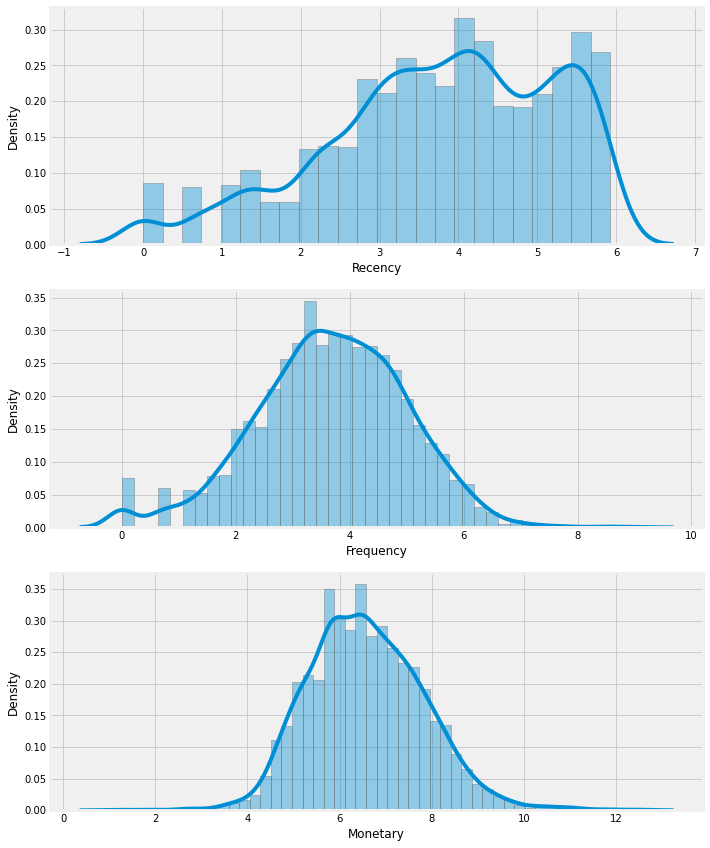

In [ ]:
#Unskew the data with log transformation
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm_log.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_log.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_log.Monetary, label = 'Monetary')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [ ]:
rec_freq = rfm_rfm.merge(data,on='CustomerID')
rec_freq

,CustomerID,Recency,Frequency,Monetary,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalRevenue
0,12347,2,182,4310.00,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,Iceland,25.20
1,12347,2,182,4310.00,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,Iceland,17.00
2,12347,2,182,4310.00,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,Iceland,39.00
3,12347,2,182,4310.00,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,Iceland,23.40
4,12347,2,182,4310.00,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,Iceland,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...
392685,18287,43,70,1837.28,570715,22419,LIPSTICK PEN RED,12,2011-10-12 10:23:00,0.42,United Kingdom,5.04
392686,18287,43,70,1837.28,570715,22866,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-12 10:23:00,2.10,United Kingdom,25.20
392687,18287,43,70,1837.28,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,United Kingdom,45.00
392688,18287,43,70,1837.28,573167,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,United Kingdom,18.72


Recency: 


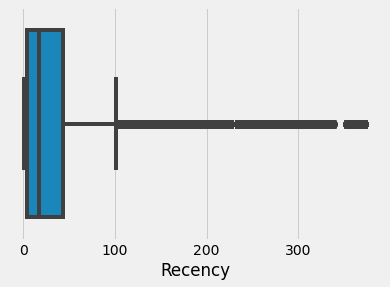

Frequency: 


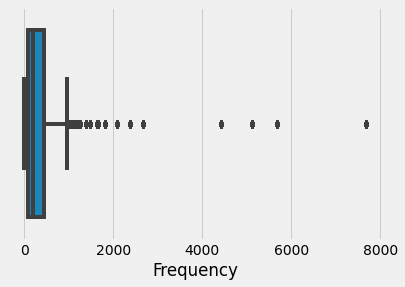

Monetary: 


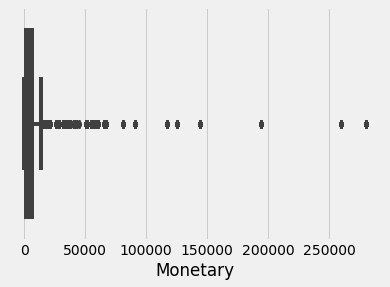

In [ ]:
new_list = ['Recency','Frequency','Monetary']
for i in new_list:
    print(str(i)+': ')
    ax = sns.boxplot(x=rec_freq[str(i)])
    plt.show()

In [ ]:
# K-Means clustering

#Normalize the variables - Scaling out
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
rfm_normalized= scaler.transform(rfm_log)

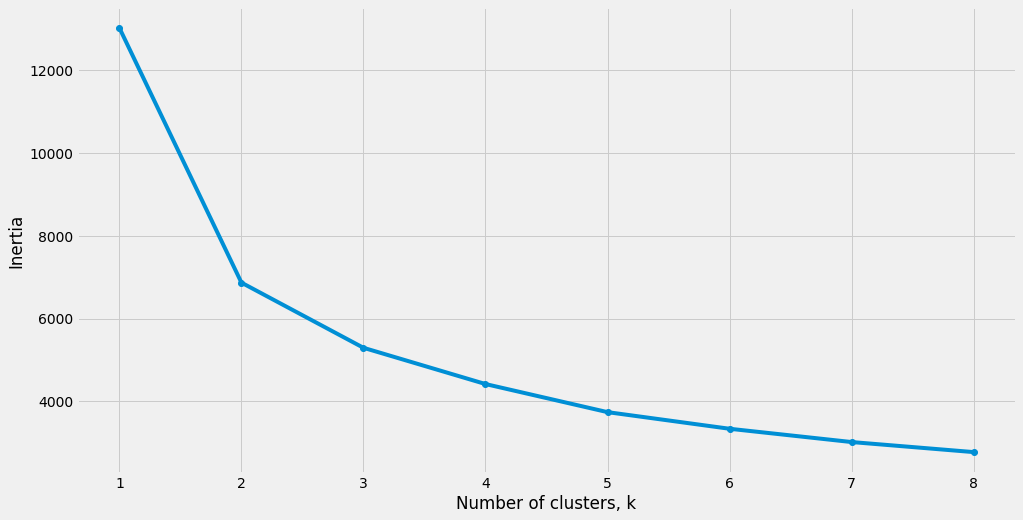

In [ ]:
from sklearn.cluster import KMeans

#First - Get the Best KMeans
ks = range(1,9)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)

# Plot ks vs inertias with Elbow method
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.show()

In [ ]:
kmeans = KMeans( n_clusters = 3, init='k-means++')
kmeans.fit(rfm_normalized)

KMeans(n_clusters=3)

In [ ]:
print(silhouette_score(rfm_normalized, kmeans.labels_, metric='euclidean'))

0.3039545655103617


In [ ]:
# clustering
kc = KMeans(n_clusters= 3, random_state=1)
kc.fit(rfm_normalized)

#Creating a cluster label column in the original DataFrame
cluster_labels = kc.labels_

#Calculating average RFM values and size for each cluster:
rfm_rfm_k3 = rfm_rfm.assign(K_Cluster = cluster_labels)

#Calculating average RFM values and sizes for each cluster:
rfm_rfm_k3.groupby('K_Cluster').agg({'Recency': 'mean','Frequency': 'mean','Monetary': ['mean', 'count'],}).round(0)

Recency Frequency Monetary      
             mean      mean     mean count
K_Cluster                                 
0           171.0      15.0    293.0  1523
1            13.0     260.0   6395.0   954
2            69.0      65.0   1126.0  1860

In [ ]:
rfm_normalized = pd.DataFrame(rfm_normalized,index=rfm_rfm.index,columns=rfm_rfm.columns)
rfm_normalized['K_Cluster'] = kc.labels_
rfm_normalized['Customer_Segmenation'] = rfm['Customer_Segmenation']
rfm_normalized.reset_index(inplace = True)

rfm_melt = pd.melt(rfm_normalized,id_vars=['CustomerID','Customer_Segmenation','K_Cluster'],value_vars=['Recency', 'Frequency', 'Monetary'],
var_name='Metric',value_name='Value')
rfm_melt.head()

,CustomerID,Customer_Segmenation,K_Cluster,Metric,Value
0,12347,Gold,1,Recency,-2.148776
1,12348,Sliver,2,Recency,0.383413
2,12349,Sliver,2,Recency,-0.575940
3,12350,Bronze,0,Recency,1.375606
4,12352,Sliver,2,Recency,-0.128755


In [ ]:
#Visualize this with a heatmap

# The further a ratio is from 0, the more important that attribute is for a segment relative to the total population
cluster_avg = rfm_rfm_k3.groupby(['K_Cluster']).mean()
population_avg = rfm_rfm.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,Monetary
K_Cluster,,,
0,0.85,-0.84,-0.85
1,-0.86,1.88,2.21
2,-0.26,-0.28,-0.43


In [ ]:
# the mean value in total
total_avg = rfm.iloc[:, 0:3].mean()
cluster_avg = rfm.groupby('Customer_Segmenation').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1
prop_rfm.round(2)

,Recency,Frequency,Monetary
Customer_Segmenation,,,
Bronze,1.08,-0.83,-0.87
Gold,-0.85,2.14,2.45
Sliver,-0.30,-0.32,-0.42


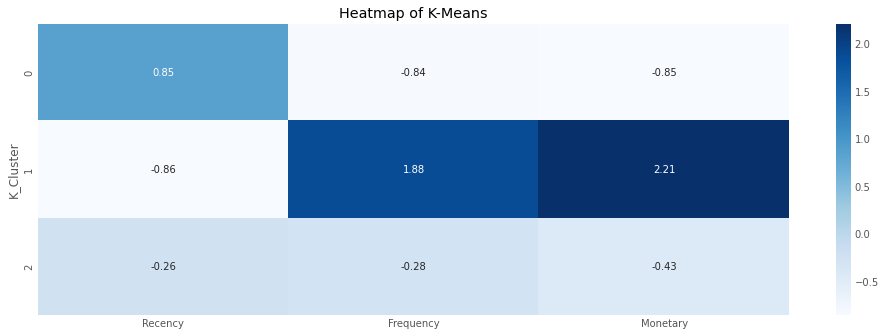

In [ ]:
f, (ax1) = plt.subplots(1,figsize=(15, 5))
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='Blues',ax=ax1)
ax1.set(title = "Heatmap of K-Means")

plt.show()

In [ ]:
#Unique list of coutries per transaction
data['Country'].value_counts()

United Kingdom          349201
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

In [ ]:
#Copy the dataframe from data
cleandata=data.copy(deep=True)

In [ ]:
#Unique list of prodcuts
data['StockCode'].value_counts()

85123A    2023
22423     1713
85099B    1615
84879     1395
47566     1389
          ... 
35597A       1
90141E       1
90141D       1
84802B       1
44242A       1
Name: StockCode, Length: 3664, dtype: int64

In [ ]:
#Create a pivot table to determine which items sold together. The pivot table contains orders and quantity
data_filter=data[['CustomerID', 'Description']]
data_filter=data_filter.reset_index()
data_filter.head()

,index,CustomerID,Description
0,0,17850,WHITE HANGING HEART T-LIGHT HOLDER
1,1,17850,WHITE METAL LANTERN
2,2,17850,CREAM CUPID HEARTS COAT HANGER
3,3,17850,KNITTED UNION FLAG HOT WATER BOTTLE
4,4,17850,RED WOOLLY HOTTIE WHITE HEART.


In [ ]:
#Create dataframe where each product has a column
data_orders=data_filter.pivot_table(index='CustomerID',columns='Description', aggfunc='count')

In [ ]:
data_orders.head()

index                                 \
Description  4 PURPLE FLOCK DINNER CANDLES  50'S CHRISTMAS GIFT BAG LARGE   
CustomerID                                                                  
12347                                  NaN                            NaN   
12348                                  NaN                            NaN   
12349                                  NaN                            NaN   
12350                                  NaN                            NaN   
12352                                  NaN                            NaN   

                                                             \
Description  DOLLY GIRL BEAKER  I LOVE LONDON MINI BACKPACK   
CustomerID                                                    
12347                      NaN                          NaN   
12348                      NaN                          NaN   
12349                      NaN                          NaN   
12350                      NaN                          NaN   
12352                      NaN                          NaN   

                                                                   \
Description  I LOVE LONDON MINI RUCKSACK  NINE DRAWER OFFICE TIDY   
CustomerID                                                          
12347                                NaN                      NaN   
12348                                NaN                      NaN   
12349                                NaN                      NaN   
12350                                NaN                      NaN   
12352                                NaN                      NaN   

                                                                  \
Description  OVAL WALL MIRROR DIAMANTE   RED SPOT GIFT BAG LARGE   
CustomerID                                                         
12347                               NaN                      NaN   
12348                               NaN                      NaN   
12349                               NaN                      NaN   
12350                               NaN                      NaN   
12352                               NaN                      NaN   

                                                                      ...  \
Description  SET 2 TEA TOWELS I LOVE LONDON   SPACEBOY BABY GIFT SET  ...   
CustomerID                                                            ...   
12347                                    NaN                     NaN  ...   
12348                                    NaN                     NaN  ...   
12349                                    NaN                     NaN  ...   
12350                                    NaN                     NaN  ...   
12352                                    NaN                     NaN  ...   

                                                                 \
Description ZINC STAR T-LIGHT HOLDER  ZINC SWEETHEART SOAP DISH   
CustomerID                                                        
12347                             NaN                       NaN   
12348                             NaN                       NaN   
12349                             NaN                       NaN   
12350                             NaN                       NaN   
12352                             NaN                       NaN   

                                                                             \
Description ZINC SWEETHEART WIRE LETTER RACK ZINC T-LIGHT HOLDER STAR LARGE   
CustomerID                                                                    
12347                                    NaN                            NaN   
12348                                    NaN                            NaN   
12349                                    NaN                            NaN   
12350                                    NaN                            NaN   
12352                                    NaN                            NaN   

                              

In [ ]:
#Replace the NaN null values in the dataframe with 0
data_orders=data_orders.fillna(0)
data_orders.head()

index                                 \
Description  4 PURPLE FLOCK DINNER CANDLES  50'S CHRISTMAS GIFT BAG LARGE   
CustomerID                                                                  
12347                                  0.0                            0.0   
12348                                  0.0                            0.0   
12349                                  0.0                            0.0   
12350                                  0.0                            0.0   
12352                                  0.0                            0.0   

                                                             \
Description  DOLLY GIRL BEAKER  I LOVE LONDON MINI BACKPACK   
CustomerID                                                    
12347                      0.0                          0.0   
12348                      0.0                          0.0   
12349                      0.0                          0.0   
12350                      0.0                          0.0   
12352                      0.0                          0.0   

                                                                   \
Description  I LOVE LONDON MINI RUCKSACK  NINE DRAWER OFFICE TIDY   
CustomerID                                                          
12347                                0.0                      0.0   
12348                                0.0                      0.0   
12349                                0.0                      0.0   
12350                                0.0                      0.0   
12352                                0.0                      0.0   

                                                                  \
Description  OVAL WALL MIRROR DIAMANTE   RED SPOT GIFT BAG LARGE   
CustomerID                                                         
12347                               0.0                      0.0   
12348                               0.0                      0.0   
12349                               0.0                      0.0   
12350                               0.0                      0.0   
12352                               0.0                      0.0   

                                                                      ...  \
Description  SET 2 TEA TOWELS I LOVE LONDON   SPACEBOY BABY GIFT SET  ...   
CustomerID                                                            ...   
12347                                    0.0                     0.0  ...   
12348                                    0.0                     0.0  ...   
12349                                    0.0                     0.0  ...   
12350                                    0.0                     0.0  ...   
12352                                    0.0                     0.0  ...   

                                                                 \
Description ZINC STAR T-LIGHT HOLDER  ZINC SWEETHEART SOAP DISH   
CustomerID                                                        
12347                             0.0                       0.0   
12348                             0.0                       0.0   
12349                             0.0                       0.0   
12350                             0.0                       0.0   
12352                             0.0                       0.0   

                                                                             \
Description ZINC SWEETHEART WIRE LETTER RACK ZINC T-LIGHT HOLDER STAR LARGE   
CustomerID                                                                    
12347                                    0.0                            0.0   
12348                                    0.0                            0.0   
12349                                    0.0                            0.0   
12350                                    0.0                            0.0   
12352                                    0.0                            0.0   

                              

In [ ]:
# Determine support and simplicity for each item
#Convert data orders to boolean
column_name=data_orders.columns
data_orders=data_orders[column_name].astype('bool')
data_orders.head()

index                                 \
Description  4 PURPLE FLOCK DINNER CANDLES  50'S CHRISTMAS GIFT BAG LARGE   
CustomerID                                                                  
12347                                False                          False   
12348                                False                          False   
12349                                False                          False   
12350                                False                          False   
12352                                False                          False   

                                                             \
Description  DOLLY GIRL BEAKER  I LOVE LONDON MINI BACKPACK   
CustomerID                                                    
12347                    False                        False   
12348                    False                        False   
12349                    False                        False   
12350                    False                        False   
12352                    False                        False   

                                                                   \
Description  I LOVE LONDON MINI RUCKSACK  NINE DRAWER OFFICE TIDY   
CustomerID                                                          
12347                              False                    False   
12348                              False                    False   
12349                              False                    False   
12350                              False                    False   
12352                              False                    False   

                                                                  \
Description  OVAL WALL MIRROR DIAMANTE   RED SPOT GIFT BAG LARGE   
CustomerID                                                         
12347                             False                    False   
12348                             False                    False   
12349                             False                    False   
12350                             False                    False   
12352                             False                    False   

                                                                      ...  \
Description  SET 2 TEA TOWELS I LOVE LONDON   SPACEBOY BABY GIFT SET  ...   
CustomerID                                                            ...   
12347                                  False                   False  ...   
12348                                  False                   False  ...   
12349                                  False                   False  ...   
12350                                  False                   False  ...   
12352                                  False                   False  ...   

                                                                 \
Description ZINC STAR T-LIGHT HOLDER  ZINC SWEETHEART SOAP DISH   
CustomerID                                                        
12347                           False                     False   
12348                           False                     False   
12349                           False                     False   
12350                           False                     False   
12352                           False                     False   

                                                                             \
Description ZINC SWEETHEART WIRE LETTER RACK ZINC T-LIGHT HOLDER STAR LARGE   
CustomerID                                                                    
12347                                  False                          False   
12348                                  False                          False   
12349                                  False                          False   
12350                                  False                          False   
12352                                  False                          False   

                              

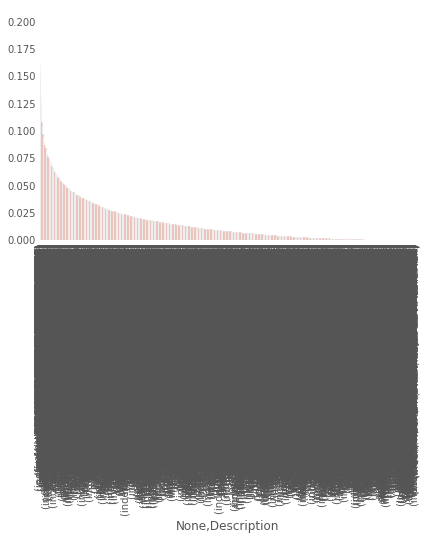

In [ ]:
#Plot the most popular selling items
data_orders.mean().sort_values(ascending=False).plot(kind='bar')

In [ ]:
data_orders.head()

index                                 \
Description  4 PURPLE FLOCK DINNER CANDLES  50'S CHRISTMAS GIFT BAG LARGE   
CustomerID                                                                  
12347                                False                          False   
12348                                False                          False   
12349                                False                          False   
12350                                False                          False   
12352                                False                          False   

                                                             \
Description  DOLLY GIRL BEAKER  I LOVE LONDON MINI BACKPACK   
CustomerID                                                    
12347                    False                        False   
12348                    False                        False   
12349                    False                        False   
12350                    False                        False   
12352                    False                        False   

                                                                   \
Description  I LOVE LONDON MINI RUCKSACK  NINE DRAWER OFFICE TIDY   
CustomerID                                                          
12347                              False                    False   
12348                              False                    False   
12349                              False                    False   
12350                              False                    False   
12352                              False                    False   

                                                                  \
Description  OVAL WALL MIRROR DIAMANTE   RED SPOT GIFT BAG LARGE   
CustomerID                                                         
12347                             False                    False   
12348                             False                    False   
12349                             False                    False   
12350                             False                    False   
12352                             False                    False   

                                                                      ...  \
Description  SET 2 TEA TOWELS I LOVE LONDON   SPACEBOY BABY GIFT SET  ...   
CustomerID                                                            ...   
12347                                  False                   False  ...   
12348                                  False                   False  ...   
12349                                  False                   False  ...   
12350                                  False                   False  ...   
12352                                  False                   False  ...   

                                                                 \
Description ZINC STAR T-LIGHT HOLDER  ZINC SWEETHEART SOAP DISH   
CustomerID                                                        
12347                           False                     False   
12348                           False                     False   
12349                           False                     False   
12350                           False                     False   
12352                           False                     False   

                                                                             \
Description ZINC SWEETHEART WIRE LETTER RACK ZINC T-LIGHT HOLDER STAR LARGE   
CustomerID                                                                    
12347                                  False                          False   
12348                                  False                          False   
12349                                  False                          False   
12350                                  False                          False   
12352                                  False                          False   

                              

In [ ]:
#Compute items that sell at a minimum of  support of 4.0%
frequent_itemsets = apriori(data_orders, min_support = 0.04, use_colnames = True)

In [ ]:
frequent_itemsets.head()

,support,itemsets
0,0.041273,"((index, 10 COLOUR SPACEBOY PEN))"
1,0.044040,"((index, 12 PENCIL SMALL TUBE WOODLAND))"
2,0.053263,"((index, 12 PENCILS SMALL TUBE RED RETROSPOT))"
3,0.044962,"((index, 12 PENCILS SMALL TUBE SKULL))"
4,0.042656,"((index, 12 PENCILS TALL TUBE RED RETROSPOT))"


In [ ]:
frequent_itemsets_rules=association_rules(frequent_itemsets,metric='confidence',min_threshold=0.4)
frequent_itemsets_rules.sort_values(by=['antecedent support'],ascending=False).head(1000)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
249,"((index, PARTY BUNTING))","((index, SPOTTY BUNTING))",0.163246,0.131658,0.068942,0.422316,3.207682,0.047449,1.503145
271,"((index, SET OF 3 CAKE TINS PANTRY DESIGN ))","((index, REGENCY CAKESTAND 3 TIER))",0.147567,0.203136,0.059258,0.401563,1.976818,0.029281,1.331575
265,"((index, SET OF 3 CAKE TINS PANTRY DESIGN ))","((index, RECIPE BOX PANTRY YELLOW DESIGN))",0.147567,0.108600,0.061102,0.414063,3.812716,0.045076,1.521322
289,"((index, SET OF 3 CAKE TINS PANTRY DESIGN ))","((index, SET OF 6 SPICE TINS PANTRY DESIGN))",0.147567,0.090616,0.062716,0.425000,4.690140,0.049344,1.581538
130,"((index, JUMBO BAG RED RETROSPOT))","((index, LUNCH BAG RED RETROSPOT))",0.146415,0.122665,0.062716,0.428346,3.491990,0.044756,1.534731
...,...,...,...,...,...,...,...,...,...
535,"((index, LUNCH BAG PINK POLKADOT), (index, LUN...","((index, LUNCH BAG CARS BLUE))",0.047729,0.110445,0.040120,0.840580,7.610844,0.034848,5.579936
488,"((index, LUNCH BAG WOODLAND), (index, LUNCH BA...","((index, LUNCH BAG RED RETROSPOT))",0.047268,0.122665,0.040581,0.858537,6.999010,0.034783,6.201848
526,"((index, LUNCH BAG PINK POLKADOT), (index, LUN...","((index, LUNCH BAG RED RETROSPOT))",0.046807,0.122665,0.040581,0.866995,7.067965,0.034840,6.596256
536,"((index, LUNCH BAG CARS BLUE), (index, LUNCH B...","((index, LUNCH BAG RED RETROSPOT))",0.046345,0.122665,0.040120,0.865672,7.057177,0.034435,6.531268
